In [142]:
import numpy as np
import matplotlib.pyplot as plt
import hiive.mdptoolbox
np.random.seed(0)
import hiive.mdptoolbox.example
from numpy import cumsum

#getting the transition and reward matrix
P, R = hiive.mdptoolbox.example.forest(S=20, r1=4, r2=2, p=0.1)
print(P,R)

#policy iteration
#Q-learning
ql = hiive.mdptoolbox.mdp.QLearning(P, R, 0.9, n_iter=10000,alpha=0.5,alpha_decay=0.99)
ql.run()
print("executed")

[[[0.1 0.9 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0. ]
  [0.1 0.  0.9 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0. ]
  [0.1 0.  0.  0.9 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0. ]
  [0.1 0.  0.  0.  0.9 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0. ]
  [0.1 0.  0.  0.  0.  0.9 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0. ]
  [0.1 0.  0.  0.  0.  0.  0.9 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0. ]
  [0.1 0.  0.  0.  0.  0.  0.  0.9 0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0. ]
  [0.1 0.  0.  0.  0.  0.  0.  0.  0.9 0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0. ]
  [0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.9 0.  0.  0.  0.  0.  0.  0.
   0.  0.  0. ]
  [0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.9 0.  0.  0.  0.  0.  0.
   0.  0.  0. ]
  [0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.9 0.  0.  0.  0.  0.
   0.  0.  0. ]
  [0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.9

In [143]:
ql.Q

array([[4.01272503e+00, 2.77365393e+00],
       [1.89739700e+00, 4.56240939e+00],
       [7.26221510e-03, 3.23148288e+00],
       [1.24669471e-02, 4.44042820e-03],
       [5.39832629e-02, 8.85781041e-03],
       [3.72947000e-01, 1.10703032e-01],
       [0.00000000e+00, 1.83542811e+00],
       [1.46981932e-02, 0.00000000e+00],
       [1.26450700e-05, 0.00000000e+00],
       [3.58960024e-03, 4.60375973e-03],
       [1.24208013e-05, 4.49046793e-02],
       [1.03698708e-02, 0.00000000e+00],
       [9.52985058e-03, 0.00000000e+00],
       [0.00000000e+00, 5.58649245e-01],
       [8.09957140e-16, 0.00000000e+00],
       [1.26503076e-05, 0.00000000e+00],
       [1.05302180e-02, 4.56817771e-03],
       [1.94112468e-04, 4.59578529e-03],
       [7.55582445e-04, 5.40884102e-02],
       [4.36441688e-01, 5.49342031e-02]])

In [144]:
ql.V

(4.012725025323527,
 4.562409389931283,
 3.231482884049944,
 0.01246694714616484,
 0.053983262936490466,
 0.37294699977561685,
 1.8354281091115345,
 0.014698193184884908,
 1.2645070033876696e-05,
 0.004603759730962441,
 0.04490467926733813,
 0.01036987075830506,
 0.009529850584187712,
 0.5586492450939267,
 8.099571395323995e-16,
 1.2650307620830619e-05,
 0.010530217965597862,
 0.004595785294766466,
 0.05408841022202776,
 0.43644168825291846)

In [145]:
ql.policy

(0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0)

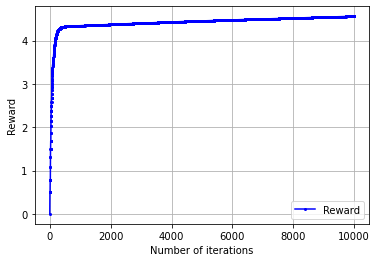

In [146]:
time_vector=[]
reward_vector=[]
iteration_vector=[]
for k in range (10000):
    time_vector.append(ql.run_stats[k].get('Time'))
    reward_vector.append(ql.run_stats[k].get('Max V'))
    iteration_vector.append(ql.run_stats[k].get('Iteration'))

plt.plot(iteration_vector, reward_vector, marker='o', markersize=2,color='blue', label='Reward')
plt.xlabel('Number of iterations')
plt.ylabel('Reward')
plt.legend(loc='lower right')
plt.grid()
plt.show()

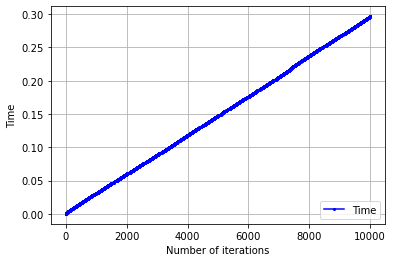

In [147]:
plt.plot(iteration_vector, time_vector, marker='o', markersize=2,color='blue', label='Time')
plt.xlabel('Number of iterations')
plt.ylabel('Time')
plt.legend(loc='lower right')
plt.grid()
plt.show()

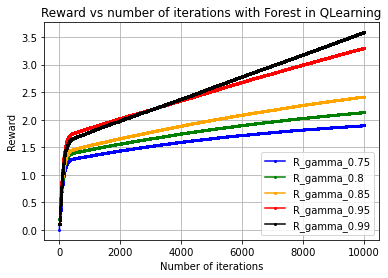

In [148]:
#evolution with a parameter gamma tuning: 
gamma_list=[0.75,0.80,0.85,0.95,0.99]
color_list=['blue','green','orange','red','black']
for g in range (0,len(gamma_list)):
    ql = hiive.mdptoolbox.mdp.QLearning(P, R, gamma_list[g])
    ql.run()
    reward_vector=[]
    iteration_vector=[]
    for k in range (10000):
        reward_vector.append(ql.run_stats[k].get('Max V'))
        iteration_vector.append(ql.run_stats[k].get('Iteration'))
    plt.plot(iteration_vector, reward_vector, marker='o', markersize=2,color=color_list[g], label='R_gamma_'+str(gamma_list[g]))
    plt.xlabel('Number of iterations')
    plt.ylabel('Reward')
    plt.title('Reward vs number of iterations with Forest in QLearning')
    plt.legend(loc='lower right')
    plt.grid()
plt.show()

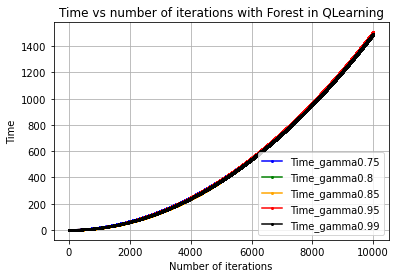

In [149]:
#evolution with a parameter gamma tuning: 
gamma_list=[0.75,0.80,0.85,0.95,0.99]
color_list=['blue','green','orange','red','black']
for g in range (0,len(gamma_list)):
    ql = hiive.mdptoolbox.mdp.QLearning(P, R, gamma_list[g])
    ql.run()
    time_vector=[]
    iteration_vector=[]
    for k in range (10000):
        time_vector.append(ql.run_stats[k].get('Time'))
        iteration_vector.append(ql.run_stats[k].get('Iteration'))
    plt.plot(iteration_vector, cumsum(time_vector), marker='o', markersize=2,color=color_list[g], label='Time_gamma'+str(gamma_list[g]))
    plt.xlabel('Number of iterations')
    plt.ylabel('Time')
    plt.title('Time vs number of iterations with Forest in QLearning')
    plt.legend(loc='lower right')
    plt.grid()
plt.show()

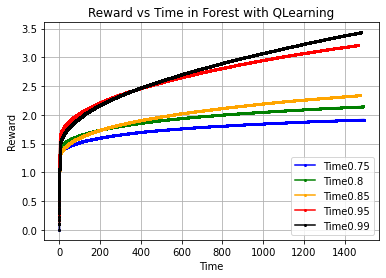

In [150]:
#evolution with a parameter gamma tuning: 
gamma_list=[0.75,0.80,0.85,0.95,0.99]
color_list=['blue','green','orange','red','black']
for g in range (0,len(gamma_list)):
    ql = hiive.mdptoolbox.mdp.QLearning(P, R, gamma_list[g])
    ql.run()
    time_vector=[]
    reward_vector=[]
    for k in range (10000):
        time_vector.append(ql.run_stats[k].get('Time'))
        reward_vector.append(ql.run_stats[k].get('Max V'))
    plt.plot(cumsum(time_vector), reward_vector, marker='o', markersize=2,color=color_list[g], label='Time'+str(gamma_list[g]))
    plt.title('Reward vs Time in Forest with QLearning')
    plt.xlabel('Time')
    plt.ylabel('Reward')
    plt.legend(loc='lower right')
    plt.grid()
plt.show()